<a href="https://colab.research.google.com/github/eluzuriaga83/data_science_bootcamp/blob/main/Identificacion_de_corrupcion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
- Sergio Veliz
- Elena Jones
- Consuelo Cordero

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Bootcamp-DS/Modulo 2/data/"

In [ ]:
df = pd.read_csv(data_path+"diputados_gastos.csv", encoding='iso-8859-1', sep=';', low_memory=False, parse_dates=['fecha_reembolso'])
print(df.shape)
df.head()

(339089, 17)


,cod_diputado,estado,partido,descripcion,empresa,id_empresa,fecha_reembolso,valor_reembolso,partido_tipo,partido_en,partido_tse,partido_nmembers,partido_ideologia1,partido_ideologia2,partido_ideology3,partido_ideologia4,posicion_partido
0,sen1,TO,DEM,FLIGHT TICKET,Cia Area - TAM,"2,01E+23",2016-07-29T00:00:00,937.63,Democratas,Democrats,25,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
1,sen2,BA,DEM,FUEL COSTS,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,"3,07E+22",2016-06-21T00:00:00,150.00,Democratas,Democrats,25,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
2,sen2,BA,DEM,FUEL COSTS,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,"3,07E+22",2016-06-01T00:00:00,100.00,Democratas,Democrats,25,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
3,sen2,BA,DEM,FUEL COSTS,MEGA POSTO BERIMBAU LTDA - ME,"1,86E+22",2016-04-19T00:00:00,168.07,Democratas,Democrats,25,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing
4,sen2,BA,DEM,FUEL COSTS,MEGA POSTO BERIMBAU LTDA - ME,"1,86E+22",2016-08-13T00:00:00,239.57,Democratas,Democrats,25,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NaN,Rightwing


In [ ]:
df["fecha_reembolso"] = pd.to_datetime(df['fecha_reembolso'].apply(lambda x: str(x).split('T')[0]),
                                       format="%Y-%m-%d"
                                       )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339089 entries, 0 to 339088
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   cod_diputado        338198 non-null  object        
 1   estado              338198 non-null  object        
 2   partido             338198 non-null  object        
 3   descripcion         339089 non-null  object        
 4   empresa             339089 non-null  object        
 5   id_empresa          296821 non-null  object        
 6   fecha_reembolso     332744 non-null  datetime64[ns]
 7   valor_reembolso     339086 non-null  float64       
 8   partido_tipo        339086 non-null  object        
 9   partido_en          339086 non-null  object        
 10  partido_tse         339086 non-null  object        
 11  partido_nmembers    339086 non-null  object        
 12  partido_ideologia1  339086 non-null  object        
 13  partido_ideologia2  288405 no

In [ ]:
df.fecha_reembolso.dt.year.unique()

array([2016.,   nan, 2017., 2015.])

# Missing Values

In [ ]:
df.isna().sum()

cod_diputado             891
estado                   891
partido                  891
descripcion                0
empresa                    0
id_empresa             42268
fecha_reembolso         6345
valor_reembolso            3
partido_tipo               3
partido_en                 3
partido_tse                3
partido_nmembers           3
partido_ideologia1         3
partido_ideologia2     50684
partido_ideology3     173446
partido_ideologia4    229539
posicion_partido         191
dtype: int64

In [ ]:
df.dropna(subset=['cod_diputado', 'valor_reembolso', 'fecha_reembolso'], inplace=True)
df.isna().sum()

cod_diputado               0
estado                     0
partido                    0
descripcion                0
empresa                    0
id_empresa             35923
fecha_reembolso            0
valor_reembolso            0
partido_tipo               0
partido_en                 0
partido_tse                0
partido_nmembers           0
partido_ideologia1         0
partido_ideologia2     49842
partido_ideology3     170260
partido_ideologia4    225359
posicion_partido         180
dtype: int64

In [ ]:
df.shape

(331853, 17)

# EDA

In [ ]:
#@title Cantidad de diputados
df.cod_diputado.unique().size
# Hay 572 diputados

572

In [ ]:
#@title Valores de `descripcion`
df.descripcion.unique()

array(['FLIGHT TICKET', 'FUEL COSTS', 'PHONE COSTS',
       'GROUND VEHICLE RENT', 'TAXI, PARKING AND TOLL COSTS',
       'MEAL COSTS', 'HOTEL COSTS', 'MAIL COSTS',
       'CONSULTING, RESEARCH AND TECHNICAL WORK COSTS',
       'DISSEMINATION OF PARLIAMENTARY ACTIVITY', 'SECURITY SERVICE',
       'OFFICE MAINTENANCE', 'PUBLICATION SIGNATURE EXPENSES',
       'AIRPLANE RENT', 'GROUND TRANSPORTATION TICKET',
       'WORKSHOP/COURSE/EVENT COSTS', 'SHIP/BOAT RENT'], dtype=object)

In [ ]:
#@title Variables Partido
print(df.partido.unique())
print(df.partido_tipo.unique())
print(df.partido_en.unique())

['DEM' 'PCdoB' 'PDT' 'PEN' 'PHS' 'PMB' 'PMDB' 'PP' 'PPS' 'PR' 'PRB' 'PROS'
 'PRP' 'PRTB' 'PSB' 'PSC' 'PSD' 'PSDB' 'PSL' 'PSOL' 'PT' 'PTB' 'PTN'
 'PTdoB' 'PV' 'REDE' 'SD']
['Democratas' 'Partido Comunista do Brasil'
 'Partido Democr\x87tico Trabalhista' 'Partido Ecol\x97gico Nacional'
 'Partido Humanista da Soliedariedade' 'Partido da Mulher Brasileira'
 'Partido do Movimento Democr\x87tico Brasileiro' 'Partido Progressista'
 'Partido Popular Socialista' 'Partido da Rep\x9cblica'
 'Partido Republicano Brasileiro' 'Partido Republicano da Ordem Social'
 'Partido Republicano Progressista'
 'Partido Renovador Trabalhista Brasileiro'
 'Partido Socialista Brasileiro' 'Partido Social Crist\x8bo'
 'Partido Social Democr\x87tico' 'Partido da Social Democracia Brasileira'
 'Partido Social Liberal' 'Partido Socialismo e Liberdade'
 'Partido dos Trabalhadores' 'Partido Trabalhista Brasileiro'
 'Partido Trabalhista Nacional' 'Partido Trabalhista do Brasil'
 'Partido Verde' 'Rede Sustentabilidade' 'S

### Análisis de valores reembolsados `valor_reembolso`

In [ ]:
df.valor_reembolso.describe()

count    331853.000000
mean        633.803354
std        2096.731185
min       -6100.000000
25%          50.000000
50%         149.440000
75%         517.790000
max      184500.000000
Name: valor_reembolso, dtype: float64

<Axes: >

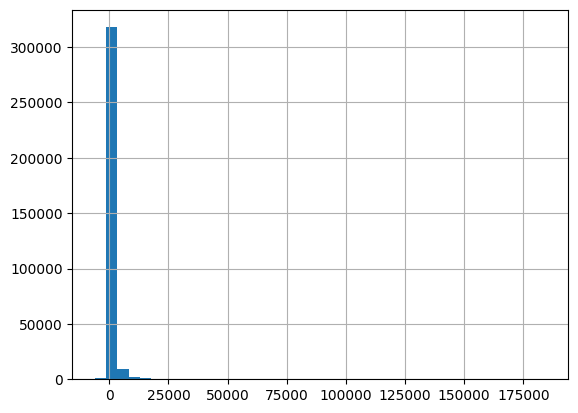

In [ ]:
df.valor_reembolso.hist(bins=40)

<Axes: >

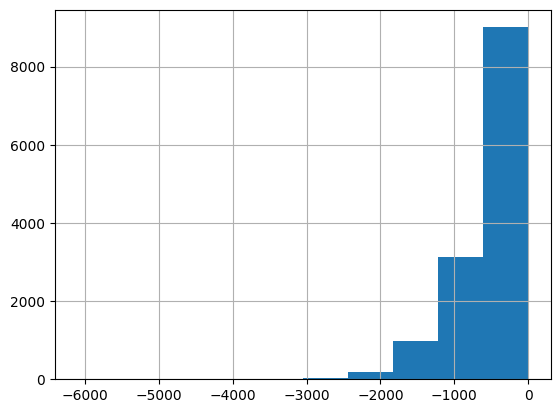

In [ ]:
df[df.valor_reembolso < 0].valor_reembolso.hist()

# Solución

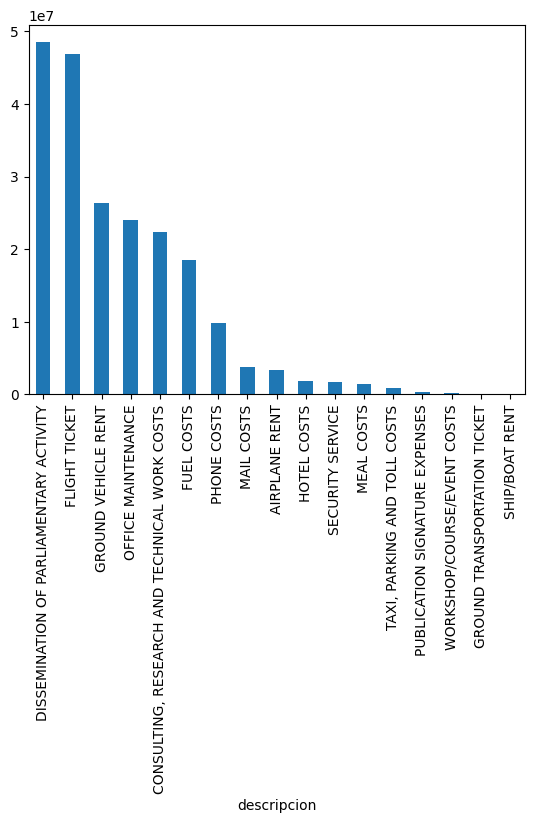

Index(['DISSEMINATION OF PARLIAMENTARY ACTIVITY', 'FLIGHT TICKET',
       'GROUND VEHICLE RENT', 'OFFICE MAINTENANCE',
       'CONSULTING, RESEARCH AND TECHNICAL WORK COSTS', 'FUEL COSTS',
       'PHONE COSTS', 'MAIL COSTS', 'AIRPLANE RENT', 'HOTEL COSTS',
       'SECURITY SERVICE', 'MEAL COSTS', 'TAXI, PARKING AND TOLL COSTS',
       'PUBLICATION SIGNATURE EXPENSES', 'WORKSHOP/COURSE/EVENT COSTS',
       'GROUND TRANSPORTATION TICKET', 'SHIP/BOAT RENT'],
      dtype='object', name='descripcion')

In [ ]:
rembolso_per_desc = df.groupby('descripcion')['valor_reembolso'].sum().sort_values(ascending=False)
rembolso_per_desc.plot(kind='bar')
plt.show()
rembolso_per_desc.index

In [ ]:
desc_to_analyze = ['DISSEMINATION OF PARLIAMENTARY ACTIVITY', 'FLIGHT TICKET',
                   'GROUND VEHICLE RENT', 'OFFICE MAINTENANCE',
                   'CONSULTING, RESEARCH AND TECHNICAL WORK COSTS', 'FUEL COSTS']

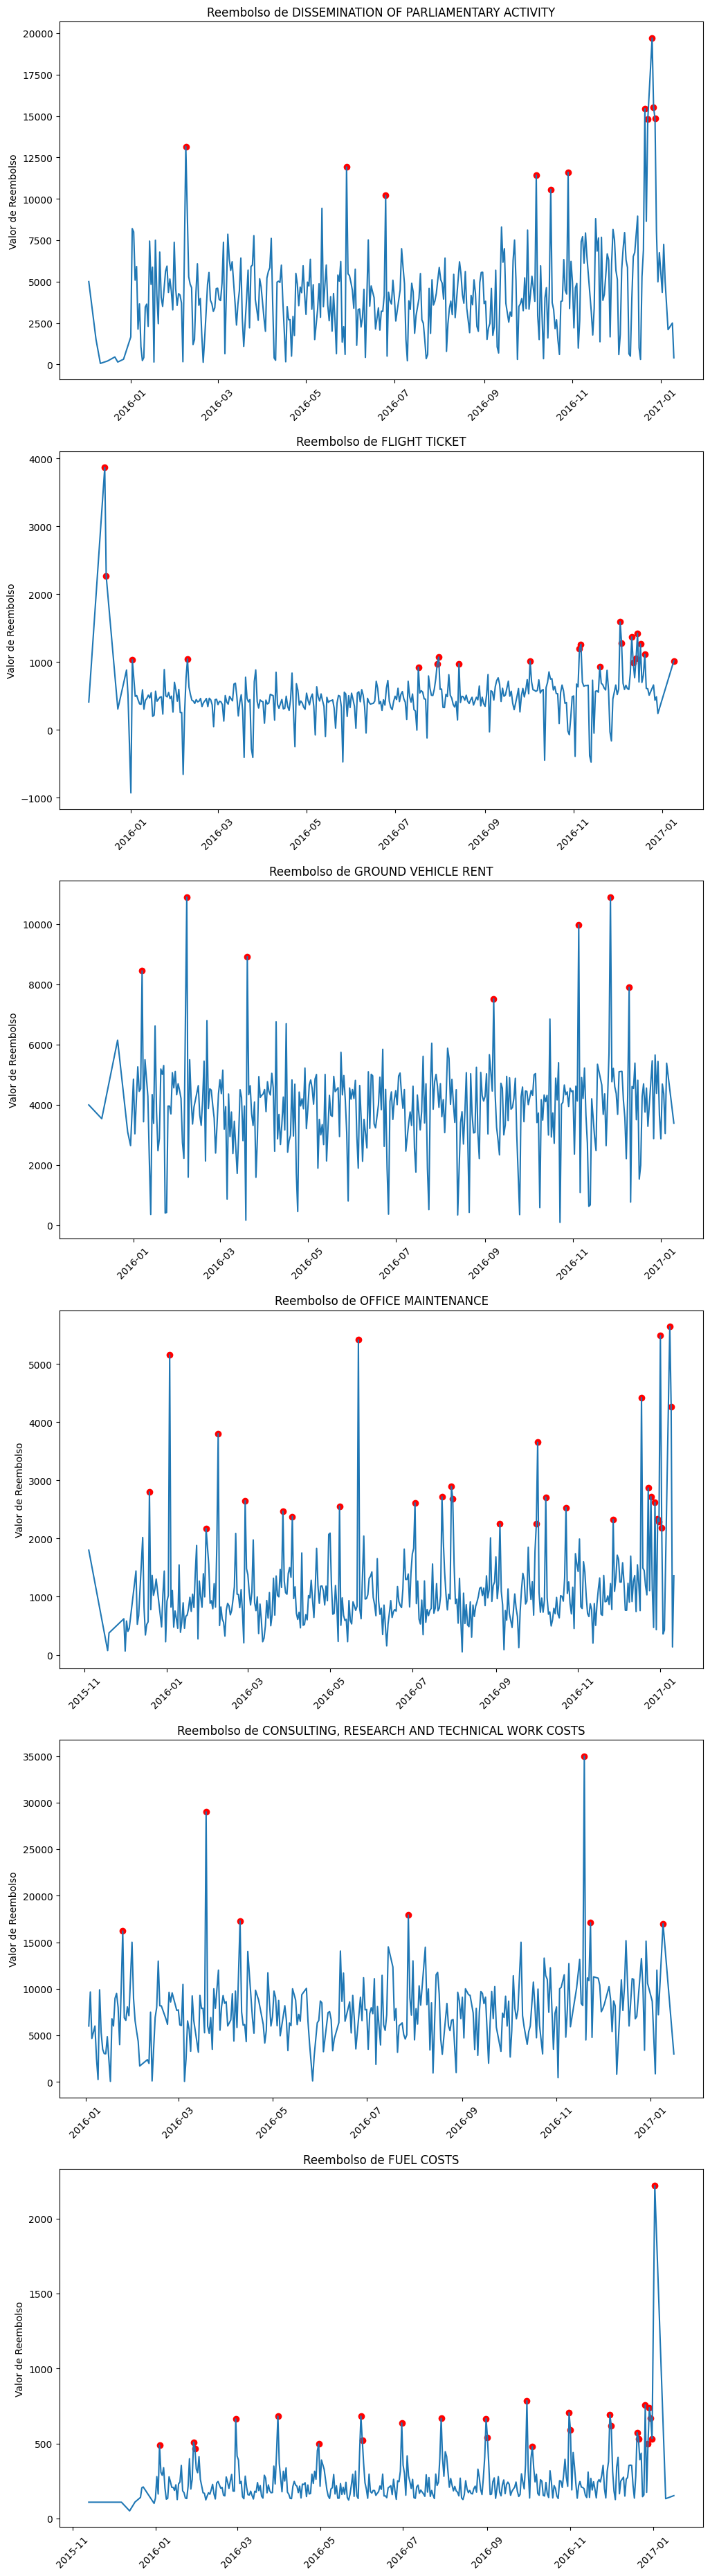

In [ ]:
#@title Anomalias por tipo de actividad <code>descripcion</code>

dic_anomalias = dict()

fig, ax = plt.subplots(nrows=6, figsize=(12, 7*6+5))

for i, desc in enumerate(desc_to_analyze):
    df_timeline = df.loc[df.descripcion==desc,:].groupby('fecha_reembolso')['valor_reembolso'].mean().reset_index()

    # Calculate the IQR and outlier limits
    q1 = df_timeline['valor_reembolso'].quantile(0.25)
    q3 = df_timeline['valor_reembolso'].quantile(0.75)
    IQR = q3 - q1
    #lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR
    outliers = df_timeline.loc[(df_timeline['valor_reembolso'] > upper_limit)]

    dic_anomalias[desc] = outliers.fecha_reembolso.copy(deep=True)

    sns.lineplot(data=df_timeline, x='fecha_reembolso', y='valor_reembolso', ax=ax[i])
    ax[i].scatter(outliers['fecha_reembolso'], outliers['valor_reembolso'], color='red')
    #ax[i].plt.xticks(rotation=90)
    ax[i].set_xticks(ax[i].get_xticks(), ax[i].get_xticklabels(), rotation=45)
    ax[i].set_ylabel('Valor de Reembolso')
    ax[i].set_xlabel('')
    ax[i].set_title(f'Reembolso de {desc}')

plt.show()


In [ ]:
dic_anomalias.keys()

dict_keys(['DISSEMINATION OF PARLIAMENTARY ACTIVITY', 'FLIGHT TICKET', 'GROUND VEHICLE RENT', 'OFFICE MAINTENANCE', 'CONSULTING, RESEARCH AND TECHNICAL WORK COSTS', 'FUEL COSTS'])

In [ ]:
diputados_con_anomalias = []
for descripcion in dic_anomalias.keys():
    time = dic_anomalias[descripcion]
    diputados_con_anomalias.append(df.loc[(df.descripcion==descripcion) &
                                          df.fecha_reembolso.isin(time) &
                                           (df.valor_reembolso>200), :]\
                                     .groupby(['cod_diputado', 'descripcion', 'fecha_reembolso'])['valor_reembolso'].sum()\
                                     .reset_index()
                                   )

diputados_con_anomalias = pd.concat(diputados_con_anomalias)
diputados_con_anomalias

,cod_diputado,descripcion,fecha_reembolso,valor_reembolso
0,sen1,DISSEMINATION OF PARLIAMENTARY ACTIVITY,2016-12-21,62850.00
1,sen1,DISSEMINATION OF PARLIAMENTARY ACTIVITY,2016-12-23,85950.00
2,sen101,DISSEMINATION OF PARLIAMENTARY ACTIVITY,2016-12-21,1500.00
3,sen104,DISSEMINATION OF PARLIAMENTARY ACTIVITY,2016-12-23,500.00
4,sen104,DISSEMINATION OF PARLIAMENTARY ACTIVITY,2016-12-26,9000.00
...,...,...,...,...
1304,sen98,FUEL COSTS,2016-09-01,856.72
1305,sen98,FUEL COSTS,2016-11-01,786.78
1306,sen98,FUEL COSTS,2016-11-30,1535.10
1307,sen99,FUEL COSTS,2016-01-29,488.66


Arriba se encuentra un DataFrame con los diputados cuyo gasto ha contribuido a un comportamiento anomalo para `descripcion` dada.

Se recomienda analizar el comportamiento de los diutados para los dias dados. Adicional añadimos el gasto total del diputado para el dia y descripcion dada.

In [ ]:
diputados_con_anomalias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1863 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   cod_diputado     1863 non-null   object        
 1   descripcion      1863 non-null   object        
 2   fecha_reembolso  1863 non-null   datetime64[ns]
 3   valor_reembolso  1863 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 72.8+ KB


In [ ]:
diputados_con_anomalias.isna().sum()

cod_diputado       0
descripcion        0
fecha_reembolso    0
valor_reembolso    0
dtype: int64

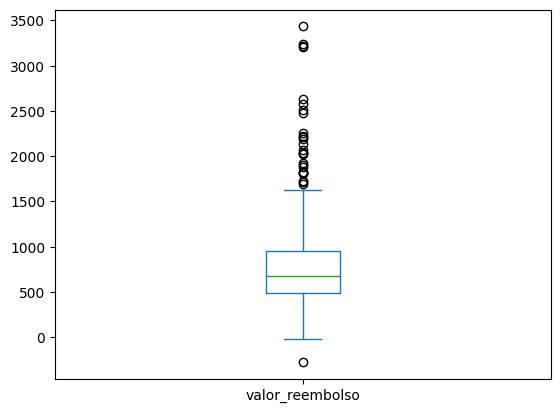

In [ ]:
mean_per_dip = df.groupby(['cod_diputado'])['valor_reembolso'].mean()
mean_per_dip.plot(kind='box')
plt.show()

In [ ]:
q1 = mean_per_dip.quantile(0.25)
q3 = mean_per_dip.quantile(0.75)
IQR = q3-q1
dip_outliers = mean_per_dip[(mean_per_dip<(q1-1.5*IQR)) | (mean_per_dip>(q1+1.5*IQR))]
dip_outliers

cod_diputado
sen13     1303.676735
sen14     1271.195767
sen140    3222.454299
sen141    1218.754573
sen142    1241.985805
             ...     
sen66     2626.353333
sen80     1390.250950
sen88     1690.562500
sen9      2515.019592
sen95     1507.138919
Name: valor_reembolso, Length: 67, dtype: float64

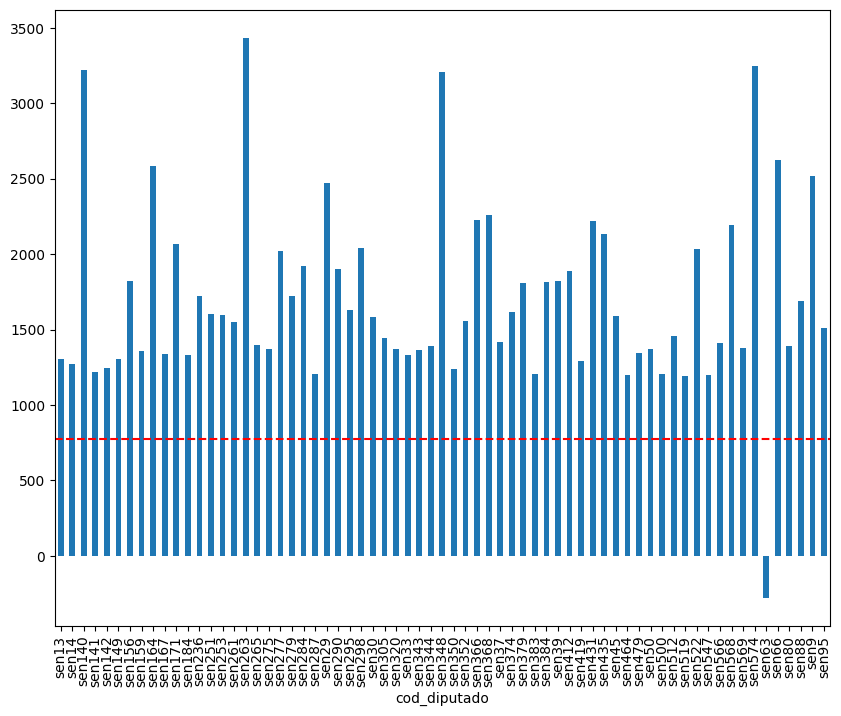

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
ax = dip_outliers.plot(kind='bar')
ax.axhline(y=mean_per_dip.mean(), color='r', linestyle='--')
plt.show()

In [ ]:
# prompt: graficar una linea horizonlar

import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots()

# Create the horizontal line
ax.axhline(y=0, color='k', linestyle='--')

# Show the plot
plt.show()
